In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, filters, exposure
from skimage.filters.rank import entropy
from skimage.morphology import disk
from skimage.util import img_as_ubyte
import os
from skimage.filters import threshold_otsu

In [2]:
ROOT_DIR = "C:\\Adrianov\\Projects\\Project-Satanael\\"
DEMO_DIR = os.path.join(ROOT_DIR, 'attack_demo')

# Segmentation with Entropy

In [70]:
img = io.imread(os.path.join(DEMO_DIR, '1497507290696(3).png'))
img_ubyte = img_as_ubyte(img)  # convert to uint8 if not already

# Structuring element for entropy
selem = disk(5)

# Compute entropy for each RGB channel
entropy_r = entropy(img_ubyte[:, :, 0], selem)
entropy_g = entropy(img_ubyte[:, :, 1], selem)
entropy_b = entropy(img_ubyte[:, :, 2], selem)

# Combine entropy maps (e.g., average or max)
entropy_combined = (entropy_r + entropy_g + entropy_b) / 3.0
# entropy_combined = np.maximum.reduce([entropy_r, entropy_g, entropy_b])  # alternative

# Normalize for visualization
entropy_norm = exposure.rescale_intensity(entropy_combined, out_range=(0, 1))

# Threshold to segment high-entropy areas
threshold = threshold_otsu(entropy_combined)
print(threshold)


3.4986347494763557


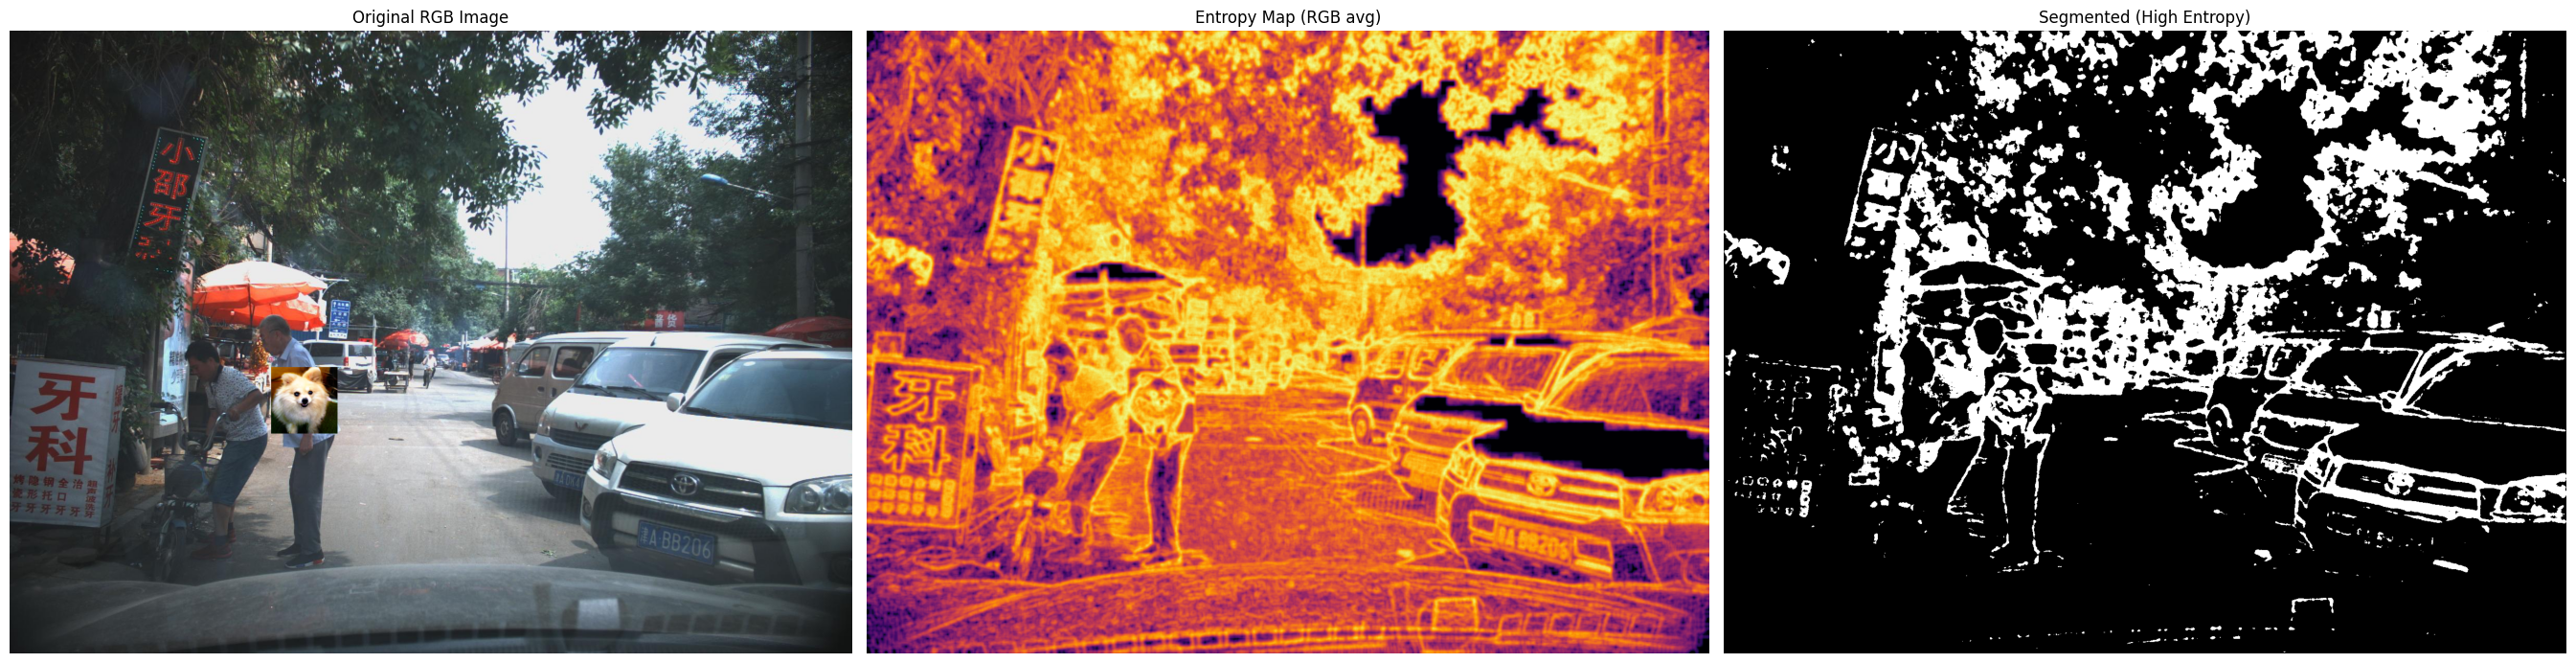

In [75]:
mask = entropy_combined > 5

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(27, 8))
axes[0].imshow(img)
axes[0].set_title("Original RGB Image")
axes[1].imshow(entropy_norm, cmap="inferno")
axes[1].set_title("Entropy Map (RGB avg)")
axes[2].imshow(mask, cmap="gray")
axes[2].set_title("Segmented (High Entropy)")
for ax in axes:
    ax.axis('off')
plt.tight_layout()
plt.show()

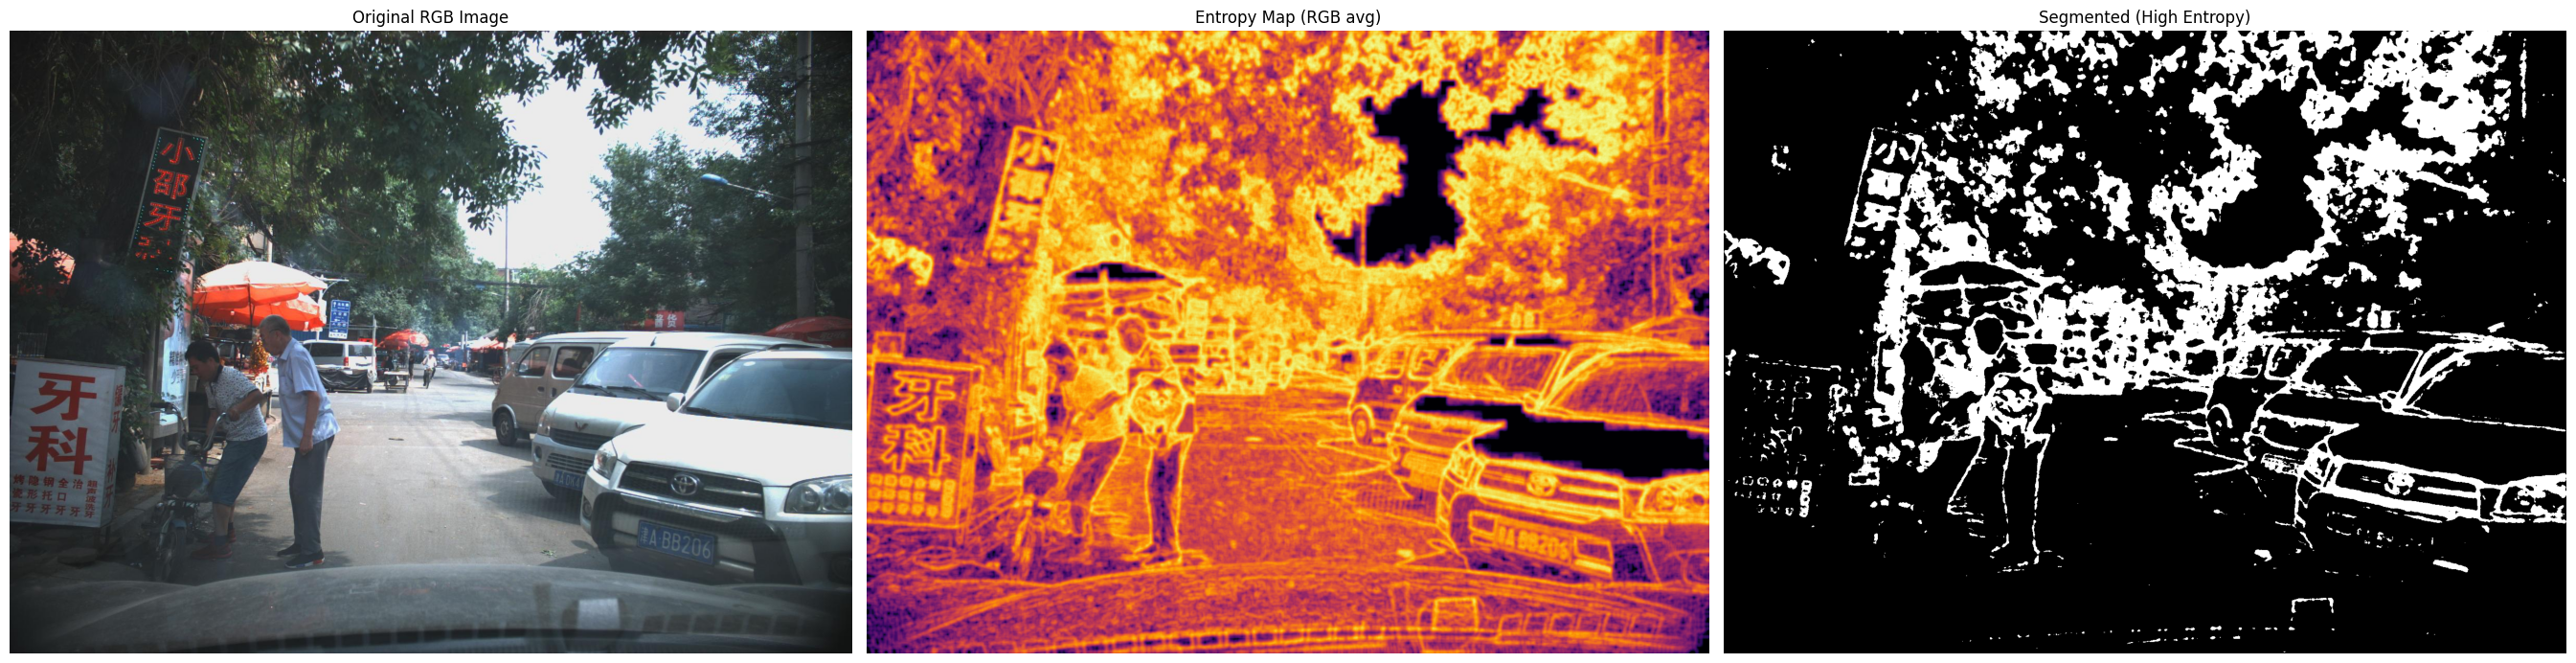

In [35]:
mask = entropy_combined > 4.3

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(27, 8))
axes[0].imshow(img)
axes[0].set_title("Original RGB Image")
axes[1].imshow(entropy_norm, cmap="inferno")
axes[1].set_title("Entropy Map (RGB avg)")
axes[2].imshow(mask, cmap="gray")
axes[2].set_title("Segmented (High Entropy)")
for ax in axes:
    ax.axis('off')
plt.tight_layout()
plt.show()

## Calculating entropy distribution of clean image

In [55]:
import numpy as np
import skimage

DATA_DIR = os.path.join(ROOT_DIR, 'data', 'tju-dhd', 'images', 'test')

img = io.imread(os.path.join(DATA_DIR, '1497507290696.jpg'))
img_ubyte = img_as_ubyte(img)

selem = disk(5)

entropy_r = skimage.filters.rank.entropy(img_ubyte[:, :, 0], selem)
entropy_g = skimage.filters.rank.entropy(img_ubyte[:, :, 1], selem)
entropy_b = skimage.filters.rank.entropy(img_ubyte[:, :, 2], selem)

entropy_combined_clean = (entropy_r + entropy_g + entropy_b) / 3.0

In [57]:
print(entropy_combined_clean.shape)

(1200, 1624)


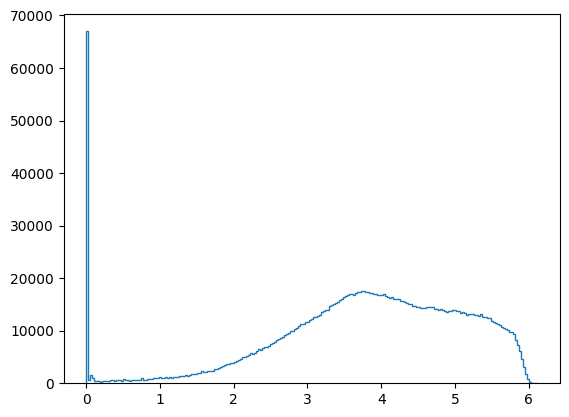

In [59]:
plt.hist(np.ravel(entropy_combined_clean), bins='auto', histtype='step')
plt.show()

## Calculating entropy distribution of adversarial patch

In [62]:
import numpy as np
import skimage

PATCH_DIR = os.path.join(ROOT_DIR, 'adv_patches')

img = io.imread(os.path.join(PATCH_DIR, 'Naturalistic1.png'))
img_ubyte = img_as_ubyte(img)

selem = disk(5)

entropy_r = skimage.filters.rank.entropy(img_ubyte[:, :, 0], selem)
entropy_g = skimage.filters.rank.entropy(img_ubyte[:, :, 1], selem)
entropy_b = skimage.filters.rank.entropy(img_ubyte[:, :, 2], selem)

entropy_combined_adv = (entropy_r + entropy_g + entropy_b) / 3.0

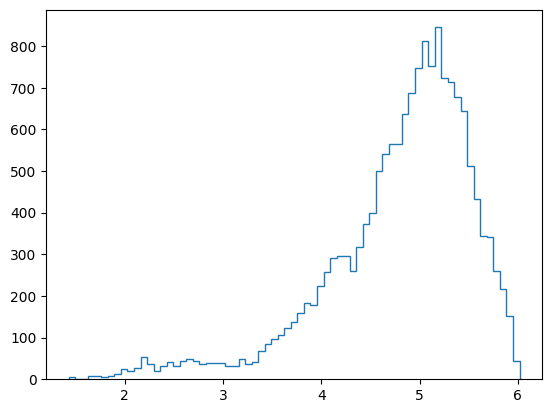

In [63]:
plt.hist(np.ravel(entropy_combined_adv), bins='auto', histtype='step')
plt.show()

## Combined entropy distribution

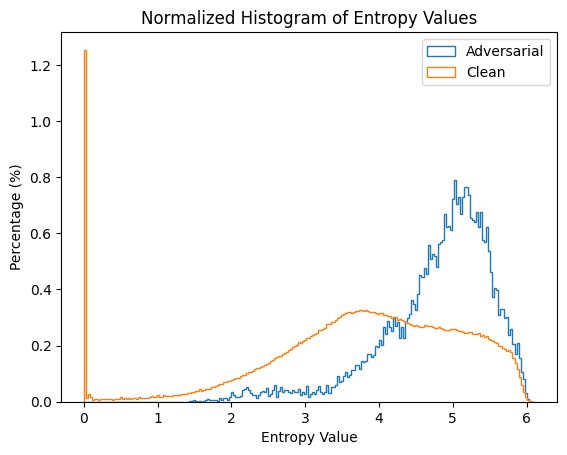

In [66]:
adv_flat = np.ravel(entropy_combined_adv)
clean_flat = np.ravel(entropy_combined_clean)

bins = np.histogram_bin_edges(np.concatenate([adv_flat, clean_flat]), bins='auto')

plt.hist(adv_flat, bins=bins, histtype='step', density=True,
         label='Adversarial', weights=np.ones_like(adv_flat) * 100. / len(adv_flat))

plt.hist(clean_flat, bins=bins, histtype='step', density=True,
         label='Clean', weights=np.ones_like(clean_flat) * 100. / len(clean_flat))

# Label and show
plt.legend()
plt.xlabel('Entropy Value')
plt.ylabel('Percentage (%)')
plt.title('Normalized Histogram of Entropy Values')
plt.show()

# Segmentation based on Semantic Independence

In [109]:
import sys
import os
import importlib.util

semantic_independence_path = os.path.abspath("../defenselib/semantic_independence.py")

spec = importlib.util.spec_from_file_location("semantic_independence", semantic_independence_path)
semanticidx = importlib.util.module_from_spec(spec)
sys.modules["semanticidx"] = semanticidx
spec.loader.exec_module(semanticidx)

C:\Adrianov\Projects\Project-Satanael\.venv\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:50: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_pred = type_of_target(labels_pred)
C:\Adrianov\Projects\Project-Satanael\.venv\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:50: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_pred = type_of_target(labels_pred)
C:\Adrianov\Projects\Project-Satanael\.venv\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:50: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_pred = type_of_target(labels_pred)
C:\Adrianov\Projects\Project-Satanael\.venv\Lib\site-packages\sklearn\metrics\c

(1199, 1623)
(1199, 1623)
max: 3.8086965
min: 0.0


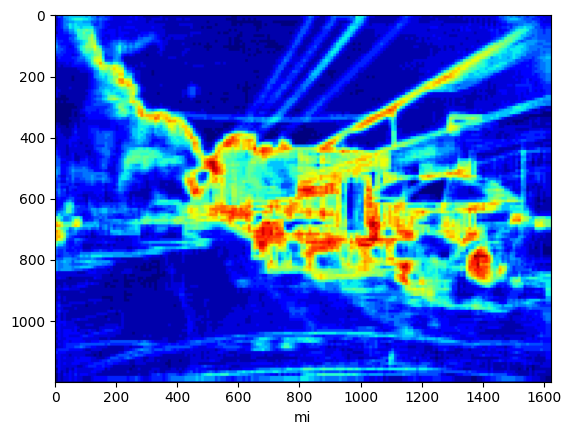

In [111]:
img = os.path.join(DEMO_DIR, '1497507290696(7).png')

E = semanticidx.img_heatmap_mi(img)
print(E.shape)

E_max = np.max(E)
E_min = np.min(E)
print('max:', E_max)
print('min:', E_min)
E = (E-E_min)*25/(E_max-E_min)  # expand pixel to [0, 255]
E = E.astype(int) # float-->int

plt.subplot(1,1,1)
plt.imshow(E, cmap=plt.cm.jet)
plt.xlabel('mi')
#plt.colorbar()
# plt.savefig("/home/dell/jlh/my_patch_defense/code/000/0125/"+name+"mi.png")
plt.show()

## Segmentation by Spatial Heterogeneity

### Testing on T-SEA Dataset

In [112]:
import sys
import os
import importlib.util

compressdiff_path = os.path.abspath("../defenselib/spatial_heterogeneity.py")

spec = importlib.util.spec_from_file_location("spatial_heterogeneity", compressdiff_path)
compressdiff = importlib.util.module_from_spec(spec)
sys.modules["compressdiff"] = compressdiff
spec.loader.exec_module(compressdiff)

height , width 1200 1624
50
max: 0.934155
min: 0.0002094048
out_height , out_width 296 402
ori_height , ori_width 1200 1624


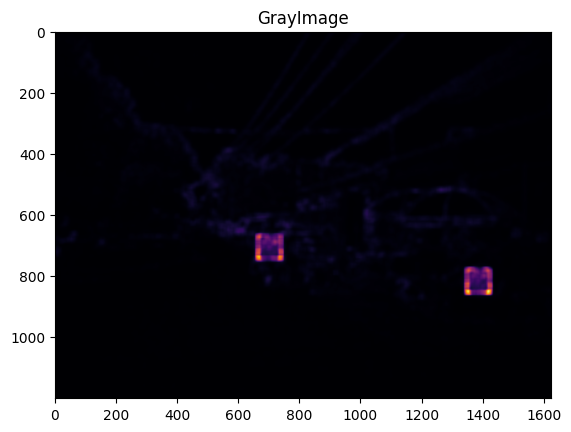

In [130]:
impath = os.path.join(DEMO_DIR, '1497507290696(7).png')
OutputMap, OutputX = compressdiff.img_heatmap_cd(impath)
print(len(OutputMap))

average_OutputMap = np.mean(OutputMap, axis=0)

OutputMap_max = np.max(average_OutputMap)
OutputMap_min = np.min(average_OutputMap)
print('max:', OutputMap_max)
print('min:', OutputMap_min)

out_height = len(average_OutputMap)
out_width = len(average_OutputMap[0])
print("out_height , out_width", out_height, out_width)

average_OutputMap = [int((average_OutputMap[i][j]-OutputMap_min)*255/(OutputMap_max-OutputMap_min)) for i in range(out_height) for j in range(out_width)]

# translate into numpy array
flatNumpyArray = np.array(average_OutputMap,dtype=np.uint8)
# Convert the array to make a grayscale image
grayImage = flatNumpyArray.reshape(out_height, out_width)

#resize to original size
img = cv2.imread(impath)
ori_height, ori_width, _ = img.shape
print("ori_height , ori_width", ori_height, ori_width)
grayImage = cv2.resize(grayImage, (ori_width, ori_height))

plt.subplot(1,1,1)
plt.imshow(grayImage, cmap='inferno')
plt.title("GrayImage")
plt.show()

### Testing on Naturalistic Patch

height , width 1200 1624
50
max: 0.96913797
min: 0.00026768656
out_height , out_width 296 402
ori_height , ori_width 1200 1624


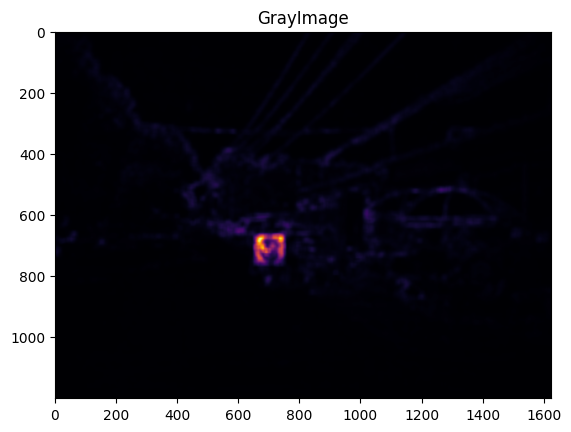

In [133]:
impath = os.path.join(DEMO_DIR, '1497507290696(6).png')
OutputMap, OutputX = compressdiff.img_heatmap_cd(impath)
print(len(OutputMap))

average_OutputMap = np.mean(OutputMap, axis=0)

OutputMap_max = np.max(average_OutputMap)
OutputMap_min = np.min(average_OutputMap)
print('max:', OutputMap_max)
print('min:', OutputMap_min)

out_height = len(average_OutputMap)
out_width = len(average_OutputMap[0])
print("out_height , out_width", out_height, out_width)

average_OutputMap = [int((average_OutputMap[i][j]-OutputMap_min)*255/(OutputMap_max-OutputMap_min)) for i in range(out_height) for j in range(out_width)]

# translate into numpy array
flatNumpyArray = np.array(average_OutputMap,dtype=np.uint8)
# Convert the array to make a grayscale image
grayImage = flatNumpyArray.reshape(out_height, out_width)

#resize to original size
img = cv2.imread(impath)
ori_height, ori_width, _ = img.shape
print("ori_height , ori_width", ori_height, ori_width)
grayImage = cv2.resize(grayImage, (ori_width, ori_height))

plt.subplot(1,1,1)
plt.imshow(grayImage, cmap='inferno')
plt.title("GrayImage")
plt.show()

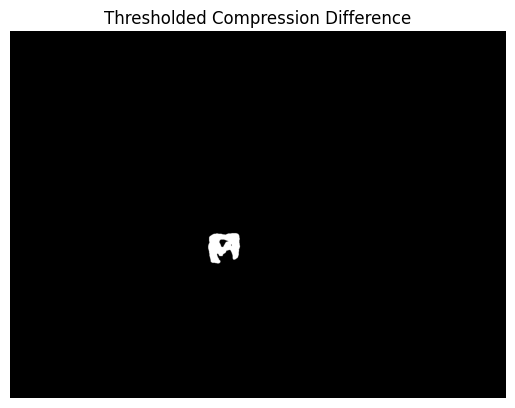

In [134]:
_, thresh_map_adversarial = cv2.threshold(grayImage, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Overlay or extract mask
plt.imshow(thresh_map_adversarial, cmap='gray')
plt.title('Thresholded Compression Difference')
plt.axis('off')
plt.show()

### One Last Testing

height , width 616 619
50
max: 0.90072984
min: 0.0008827398
out_height , out_width 150 150
ori_height , ori_width 616 619


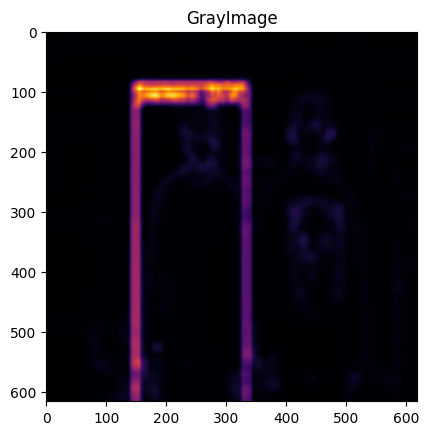

In [135]:
impath = os.path.join(DEMO_DIR, 'image.png')
OutputMap, OutputX = compressdiff.img_heatmap_cd(impath)
print(len(OutputMap))

average_OutputMap = np.mean(OutputMap, axis=0)

OutputMap_max = np.max(average_OutputMap)
OutputMap_min = np.min(average_OutputMap)
print('max:', OutputMap_max)
print('min:', OutputMap_min)

out_height = len(average_OutputMap)
out_width = len(average_OutputMap[0])
print("out_height , out_width", out_height, out_width)

average_OutputMap = [int((average_OutputMap[i][j]-OutputMap_min)*255/(OutputMap_max-OutputMap_min)) for i in range(out_height) for j in range(out_width)]

# translate into numpy array
flatNumpyArray = np.array(average_OutputMap,dtype=np.uint8)
# Convert the array to make a grayscale image
grayImage = flatNumpyArray.reshape(out_height, out_width)

#resize to original size
img = cv2.imread(impath)
ori_height, ori_width, _ = img.shape
print("ori_height , ori_width", ori_height, ori_width)
grayImage = cv2.resize(grayImage, (ori_width, ori_height))

plt.subplot(1,1,1)
plt.imshow(grayImage, cmap='inferno')
plt.title("GrayImage")
plt.show()

# Saliency Segmentation

In [120]:
import cv2

img = cv2.imread(os.path.join(DEMO_DIR, '1497507290696(8).png'))
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
saliency = cv2.saliency.StaticSaliencyFineGrained_create()
(success, saliency_map) = saliency.computeSaliency(img)
saliency_map = (saliency_map * 255).astype("uint8")

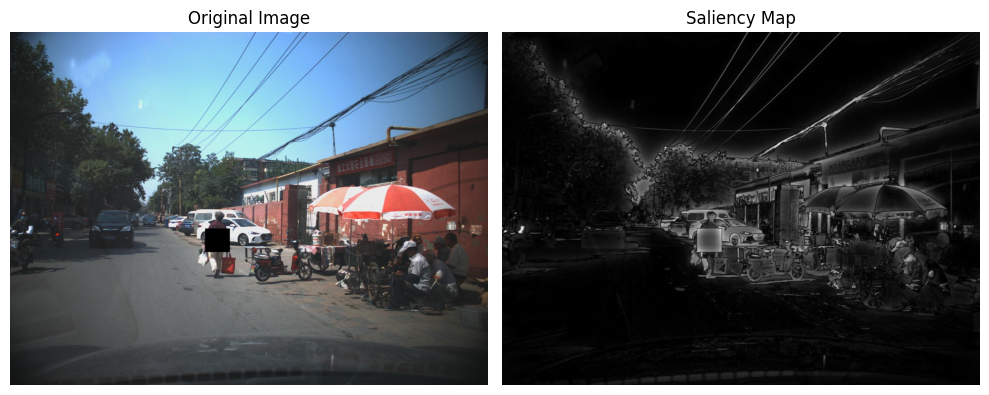

In [121]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(img_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(saliency_map, cmap='gray')
plt.title('Saliency Map')
plt.axis('off')
plt.tight_layout()
plt.show()

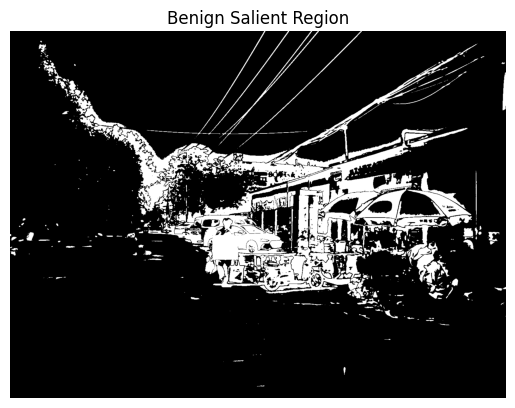

In [122]:
_, thresh_map_clean = cv2.threshold(saliency_map, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Overlay or extract mask
plt.imshow(thresh_map_clean, cmap='gray')
plt.title('Benign Salient Region')
plt.axis('off')
plt.show()

In [123]:
import cv2

img = cv2.imread(os.path.join(DEMO_DIR, '1497507290696(7).png'))
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
saliency = cv2.saliency.StaticSaliencyFineGrained_create()
(success, saliency_map) = saliency.computeSaliency(img)
saliency_map = (saliency_map * 255).astype("uint8")

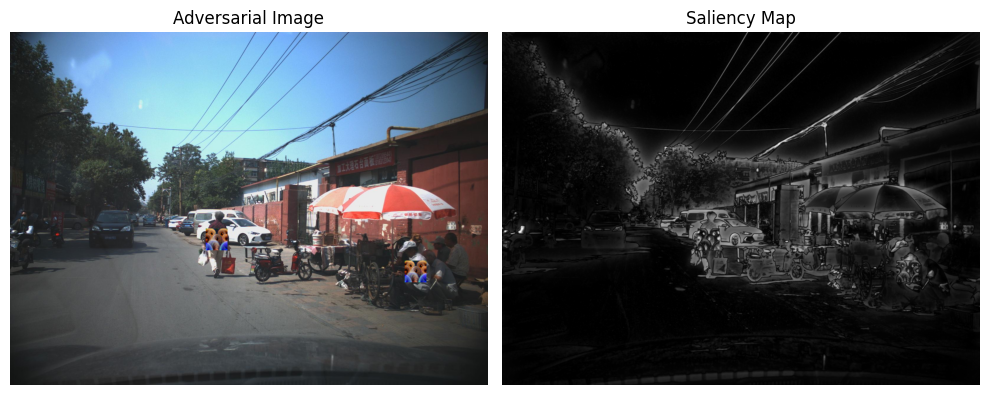

In [124]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(img_rgb)
plt.title('Adversarial Image')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(saliency_map, cmap='gray')
plt.title('Saliency Map')
plt.axis('off')
plt.tight_layout()
plt.show()

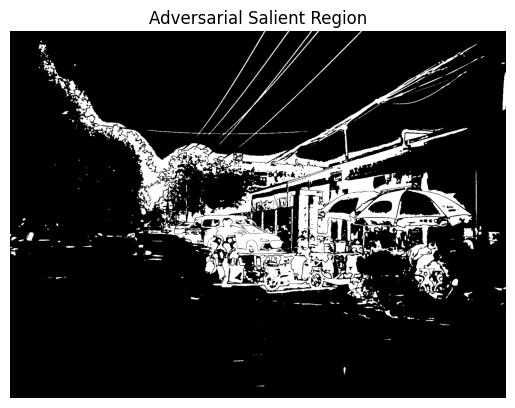

In [125]:
_, thresh_map_adversarial = cv2.threshold(saliency_map, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Overlay or extract mask
plt.imshow(thresh_map_adversarial, cmap='gray')
plt.title('Adversarial Salient Region')
plt.axis('off')
plt.show()

## Morphological Operation

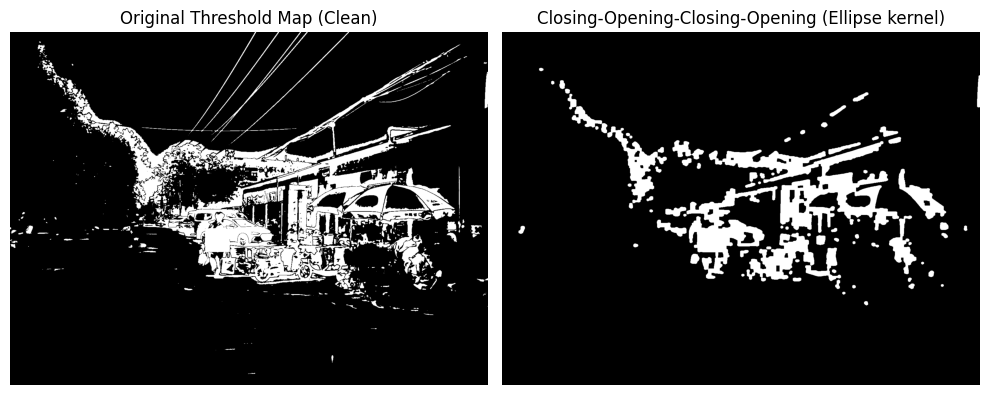

In [126]:
ellipse_kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7, 7))
ellipse_kernel_l = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (10, 10))
rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7, 7))
cross_kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (7, 7))

opening = cv2.morphologyEx(thresh_map_clean, cv2.MORPH_OPEN, ellipse_kernel_l)

closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, rect_kernel)

opening = cv2.morphologyEx(closing, cv2.MORPH_OPEN, ellipse_kernel)


plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(thresh_map_clean, cmap='gray')
plt.title('Original Threshold Map (Clean)')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(opening, cmap='gray')
plt.title('Closing-Opening-Closing-Opening (Ellipse kernel)')
plt.axis('off')
plt.tight_layout()
plt.show()

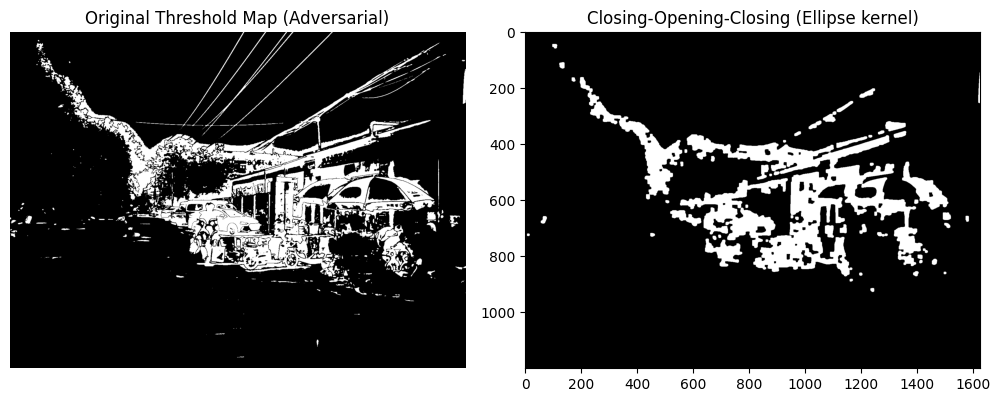

In [127]:
opening = cv2.morphologyEx(thresh_map_adversarial, cv2.MORPH_OPEN, ellipse_kernel)

closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, rect_kernel)

opening = cv2.morphologyEx(closing, cv2.MORPH_OPEN, ellipse_kernel_l)

mask = opening

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(thresh_map_adversarial, cmap='gray')
plt.title('Original Threshold Map (Adversarial)')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(mask, cmap='gray')
plt.title('Closing-Opening-Closing (Ellipse kernel)')
plt.tight_layout()
plt.show()

In [128]:
min_area = 20 * 20

# Find connected components
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(opening, connectivity=8)

# Create an empty mask to store only large components
filtered_mask = np.zeros_like(opening, dtype=np.uint8)

# Iterate through all components and keep those with area >= min_area
for i in range(1, num_labels):  # Skip background (label 0)
    area = stats[i, cv2.CC_STAT_AREA]
    if area >= min_area:
        filtered_mask[labels == i] = 255

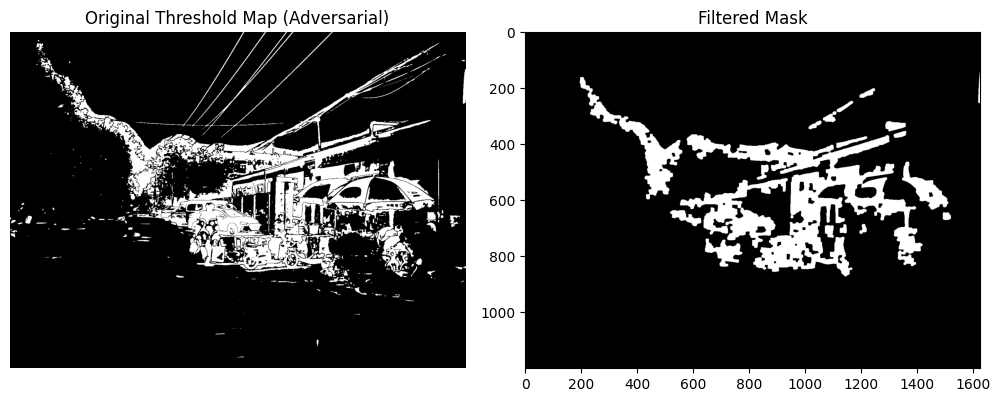

In [129]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(thresh_map_adversarial, cmap='gray')
plt.title('Original Threshold Map (Adversarial)')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(filtered_mask, cmap='gray')
plt.title('Filtered Mask')
plt.tight_layout()
plt.show()